## Hi there, Sagar here! As we all know that Netflix is the one of the most viewed OTT platform. So here is an **Exploratory Data Analysis** on the Netflix different shows and their popularity with the views

![](Netflix%20logo.png)

In [2]:
%pip install pandas
%pip install matplotlib
%pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the dataset

In [4]:
netflix_raw=pd.read_csv("netflix_titles.csv")


In [5]:
netflix_raw.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


So as we can see that there are 12 columns. Now let's see how many entries are there.

In [6]:
netflix_raw.count()

show_id         8807
type            8807
title           8807
director        6173
cast            7982
country         7976
date_added      8797
release_year    8807
rating          8803
duration        8804
listed_in       8807
description     8807
dtype: int64

So here as we can see there are around 8k entries for each of the column but some entries are not there in the <code>director</code>,<code>cast</code>,<code>country</code> and <code>date added</code>. This may be null values or absent in dataset

## Analysis of Movie Vs TV Show

In [7]:
netflix_raw.type.unique()

array(['Movie', 'TV Show'], dtype=object)

Let's display the content of the column <code>type</code> 

C:\Users\USER\AppData\Local\Temp\ipykernel_16844\1316379206.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x="type",data=netflix_raw,palette="Set2")


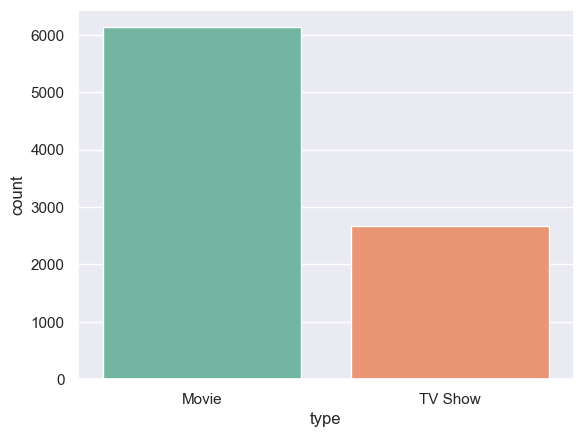

In [8]:
sns.set(style='darkgrid')
ax=sns.countplot(x="type",data=netflix_raw,palette="Set2")

## If a producer wants to realease some content what month would be the best for the content release?

The month with the least amount of content released will be the most favourable time of content release.\
Let's plot a **heatmap** for the following data.

In [9]:
netflix_date = netflix_raw[['date_added']].dropna()
netflix_date["year"]=netflix_date["date_added"].apply(lambda x: x.split(",")[-1])
netflix_date["month"]=netflix_date["date_added"].apply(lambda x: x.split()[0])


In [10]:
month_order=["January","February","March",'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
dataframe=netflix_date.groupby("year")["month"].value_counts().unstack().fillna(0)[month_order].T
dataframe

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
month,,,,,,,,,,,,,,
December,0.0,0.0,0.0,0.0,1.0,2.0,6.0,21.0,96.0,118.0,185.0,215.0,169.0,0.0
November,0.0,1.0,1.0,0.0,1.0,2.0,4.0,4.0,44.0,85.0,154.0,255.0,154.0,0.0
October,0.0,0.0,0.0,11.0,0.0,3.0,4.0,14.0,51.0,126.0,191.0,193.0,167.0,0.0
September,0.0,0.0,0.0,1.0,0.0,2.0,1.0,7.0,48.0,113.0,124.0,123.0,168.0,183.0
August,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,34.0,115.0,164.0,131.0,129.0,178.0
July,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0,28.0,79.0,152.0,157.0,146.0,257.0
June,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,18.0,94.0,78.0,168.0,156.0,207.0
May,0.0,1.0,0.0,1.0,0.0,0.0,0.0,6.0,13.0,86.0,97.0,139.0,157.0,132.0
April,0.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,22.0,93.0,115.0,162.0,177.0,188.0


### Drawing the heat map

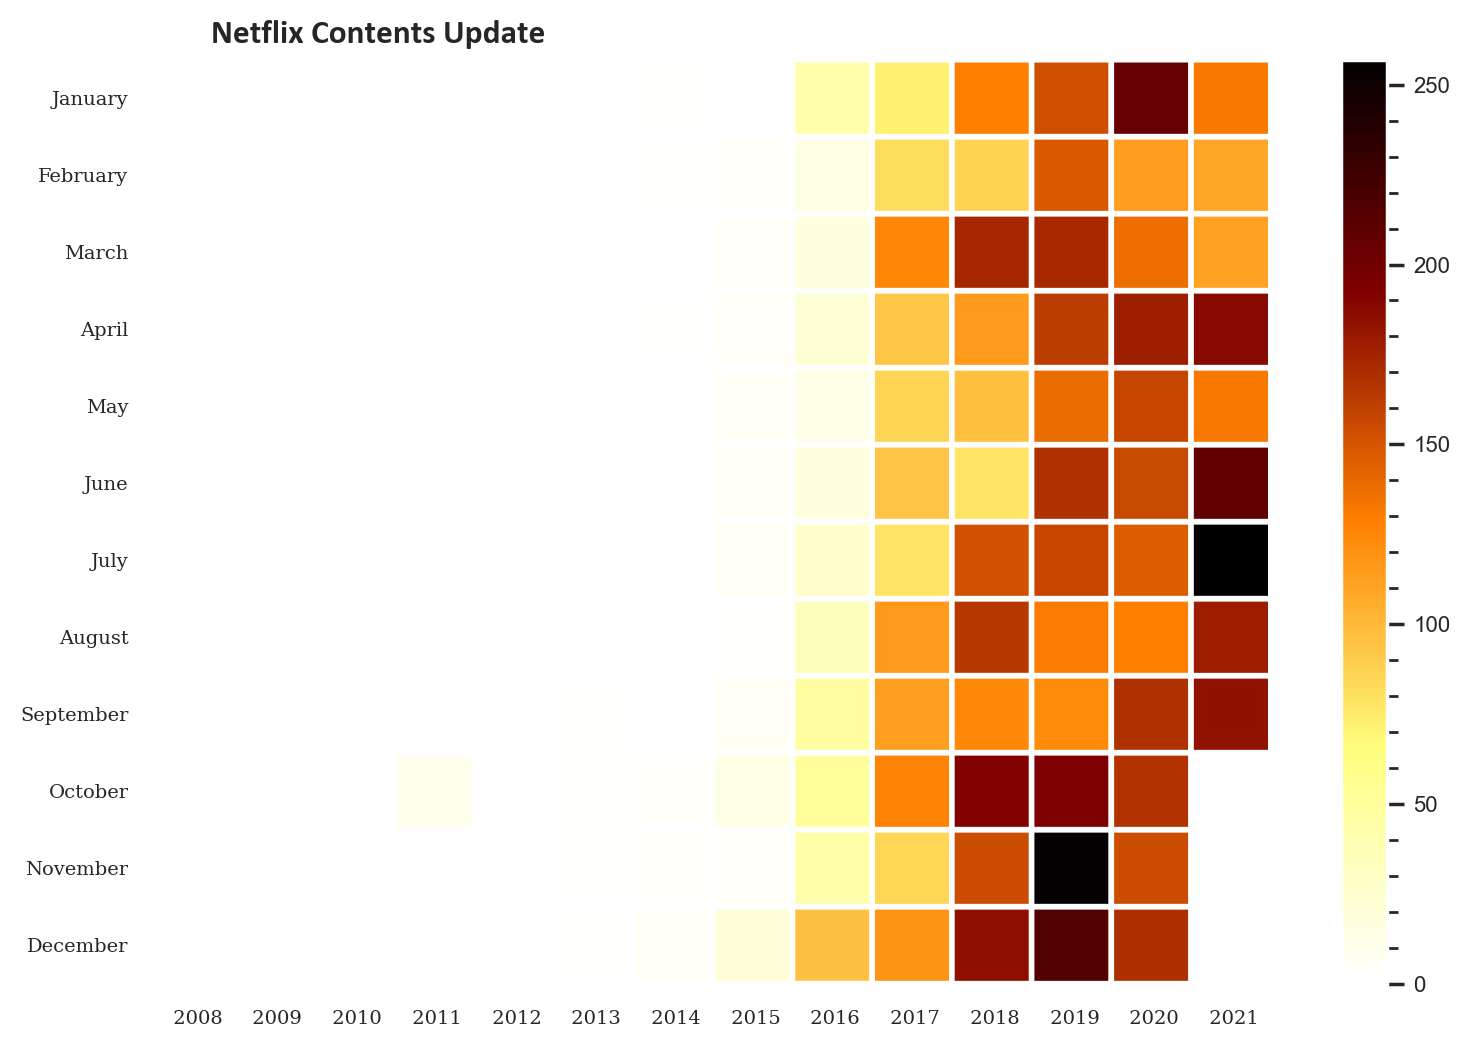

In [11]:
plt.figure(figsize=(9,6), dpi=200)
plt.pcolor(dataframe, cmap="afmhot_r",edgecolor="white",linewidths=2)
plt.xticks(np.arange(0.5, len(dataframe.columns),1),dataframe.columns,fontsize=7,fontfamily="serif")
plt.yticks(np.arange(0.5, len(dataframe.index),1),dataframe.index,fontsize=7,fontfamily="serif")
plt.title('Netflix Contents Update', fontsize=12, fontfamily='calibri', fontweight='bold', position=(0.20, 1.0+0.02))
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=8)
cbar.ax.minorticks_on()
plt.show()

Months of february and march seems to be the most favourable months for the release

## Moving Rating Analysis

In [12]:
netflix_raw.rating.unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [13]:
netflix_raw.rating.value_counts()

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

Let's plot this graph with the help of <code>bar graph</code>

C:\Users\USER\AppData\Local\Temp\ipykernel_16844\2717029732.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x="rating", data=netflix_raw,palette="Set2", order=netflix_raw['rating'].value_counts().index[0:15])


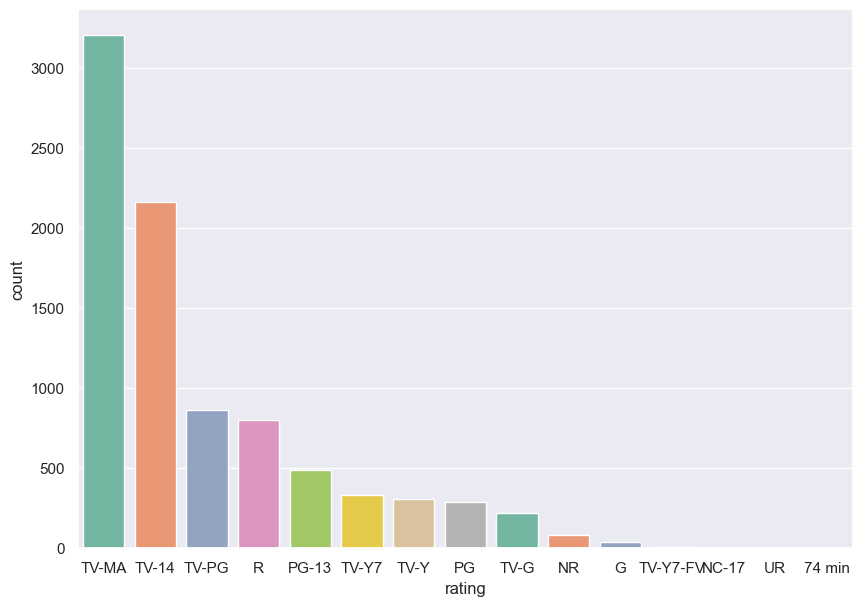

In [14]:
plt.figure(figsize=(10,7))
sns.set(style='darkgrid')
ax=sns.countplot(x="rating", data=netflix_raw,palette="Set2", order=netflix_raw['rating'].value_counts().index[0:15])


### Insights-:
*  <code>TV-MA</code> are the most rated movies which suggests that maximum movies fall under the category in which children can watch movies in the presence of parents 
*  <code>TV-14</code> are the 2nd most rated movies which suggests that maximum movies fall under the category in which for the children under the age of 14 the movie can be inappropriate.
* <code>TV-PG</code> are the 3rd most rated movies which suggests that maximum movies fall under the category in which for the children under the age of 17 the movie can be inappropriate.


## Country Analysis

Let's see the number of netflix shows with respect to each country

In [15]:
country_count=netflix_raw.country.value_counts().head(10)
country_count_df=pd.DataFrame(country_count)
country_count_df=country_count_df.reset_index()
country_count_df

,country,count
0,United States,2818
1,India,972
2,United Kingdom,419
3,Japan,245
4,South Korea,199
5,Canada,181
6,Spain,145
7,France,124
8,Mexico,110
9,Egypt,106


In [16]:
country_count_df

,country,count
0,United States,2818
1,India,972
2,United Kingdom,419
3,Japan,245
4,South Korea,199
5,Canada,181
6,Spain,145
7,France,124
8,Mexico,110
9,Egypt,106


C:\Users\USER\AppData\Local\Temp\ipykernel_16844\1833621421.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="country", y="count", data=country_count_df, palette="Set2", order=order)


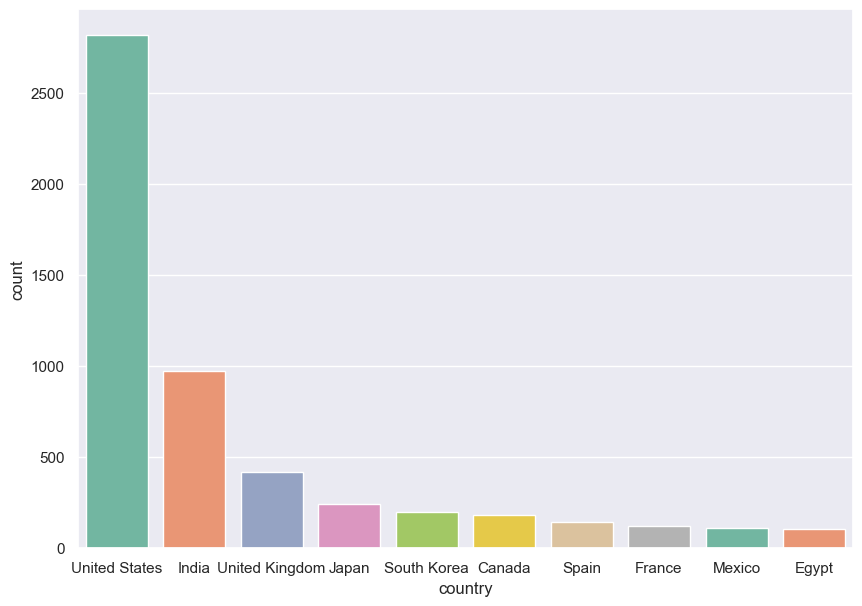

In [17]:
plt.figure(figsize=(10,7))
sns.set(style="darkgrid")
order = country_count_df.sort_values(by="count",ascending=False)["country"]
ax = sns.barplot(x="country", y="count", data=country_count_df, palette="Set2", order=order)

## Insights-
* In Netflix maximum shows are released by **United Kingdoms**.
* So it is safe to say Netflix promotes United Shows more it may have several reasons -:
* The watching public
* The qualtiy standards of Netflix

## Year Wise Analysis

C:\Users\USER\AppData\Local\Temp\ipykernel_16844\2226675326.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="release_year",data=netflix_raw, palette="Set2", order=netflix_raw.release_year.value_counts().index[0:15])


<Axes: title={'center': 'Year Wise Analysis of Movies on Netflix'}, xlabel='count', ylabel='release_year'>

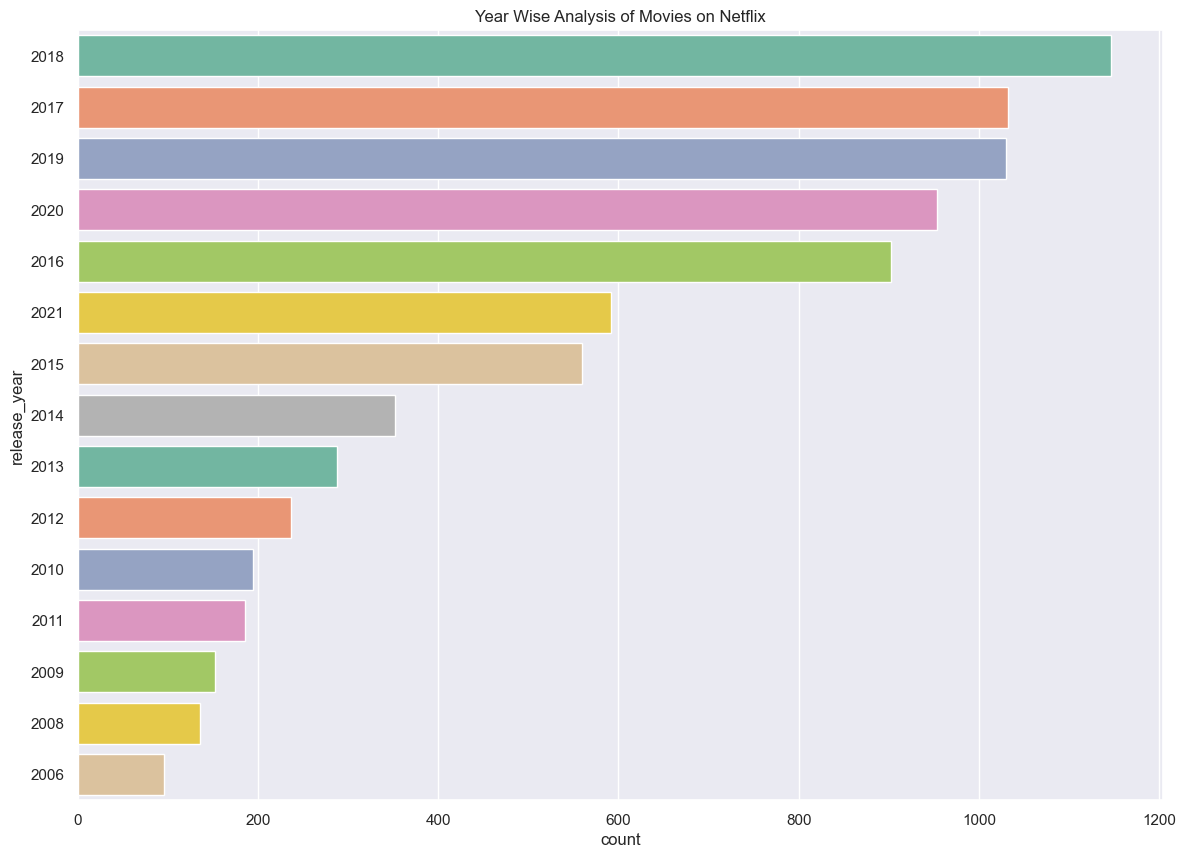

In [18]:
plt.figure(figsize=(14,10))
plt.title("Year Wise Analysis of Movies on Netflix")
sns.countplot(y="release_year",data=netflix_raw, palette="Set2", order=netflix_raw.release_year.value_counts().index[0:15])

The overall growth of the graph can be said to be uniformly exponential with increase in each year because of increase in the popularity of Netflix and people showing interests in the OTT platforms and it doesnt seem that it has been saturated


In [19]:
netflix_raw.head(20)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


## Analysis of Duration of Movies

Here, the duration of shows is given in either min or seasons lets plot different graphs for both of them.

### Data preparation for sepreration

In [20]:
netflix_s_count=netflix_raw[netflix_raw.duration.str.len()>7]
netflix_seasons=netflix_s_count.duration.value_counts()
netflix_seasons=pd.DataFrame(netflix_seasons).reset_index()
netflix_seasons

,duration,count
0,1 Season,1793
1,2 Seasons,425
2,3 Seasons,199
3,4 Seasons,95
4,5 Seasons,65
5,6 Seasons,33
6,7 Seasons,23
7,8 Seasons,17
8,9 Seasons,9
9,10 Seasons,7


C:\Users\USER\AppData\Local\Temp\ipykernel_16844\1189240764.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x="duration",y="count",data=netflix_seasons, palette="Set3")


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, '1 Season'),
  Text(1, 0, '2 Seasons'),
  Text(2, 0, '3 Seasons'),
  Text(3, 0, '4 Seasons'),
  Text(4, 0, '5 Seasons'),
  Text(5, 0, '6 Seasons'),
  Text(6, 0, '7 Seasons'),
  Text(7, 0, '8 Seasons'),
  Text(8, 0, '9 Seasons'),
  Text(9, 0, '10 Seasons'),
  Text(10, 0, '13 Seasons'),
  Text(11, 0, '12 Seasons'),
  Text(12, 0, '15 Seasons'),
  Text(13, 0, '11 Seasons'),
  Text(14, 0, '17 Seasons')])

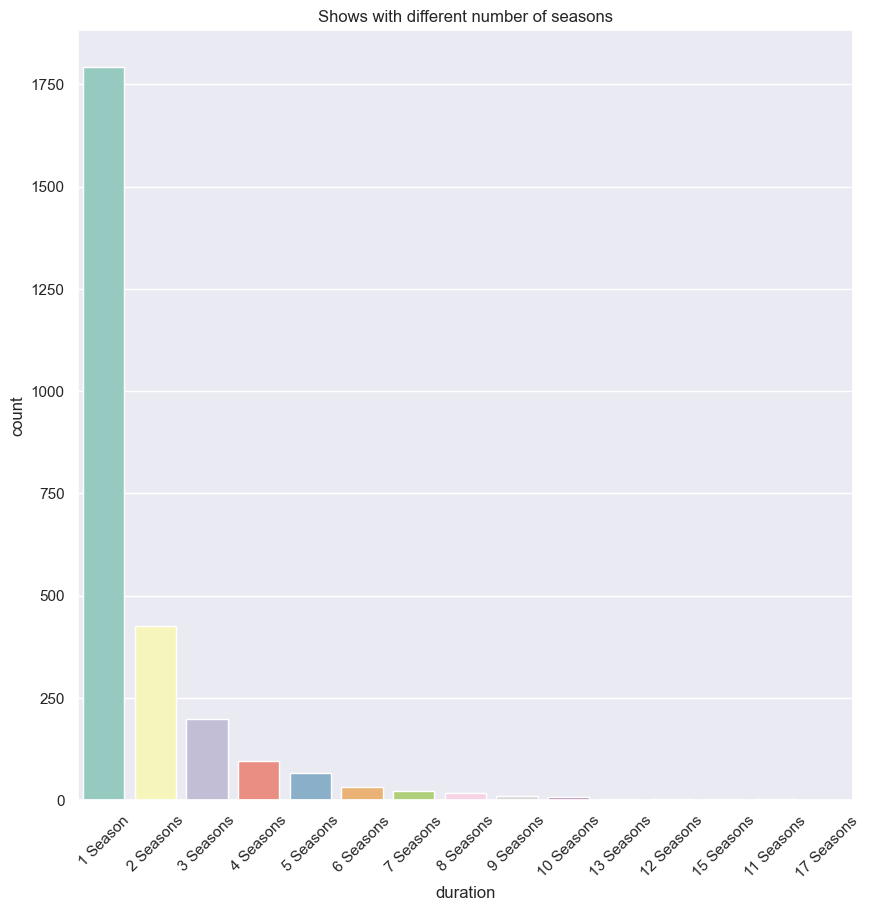

In [21]:
plt.figure(figsize=(10,10))
plt.title("Shows with different number of seasons")
ax=sns.barplot(x="duration",y="count",data=netflix_seasons, palette="Set3")
plt.xticks(rotation=45)


In the movie shows of 8k+ shows 450 shows have 2 seasons around 200 has 3 seasons etc.\ 
Now let's plot the graph for the season 1 with different time duration.

In [22]:
netflix_s_min=netflix_raw[netflix_raw.duration.str[-2]=="i"]

## Histogram on Netflix duration

### Data preparation and cleaning

<code>netflix_s_min</code> has the minutes in the <code>str</code> data type we will have to convert them in <code>int</code>

In [23]:
netflix_s_min["minutes"]=netflix_s_min.duration.str.split().str[0].astype(int)

C:\Users\USER\AppData\Local\Temp\ipykernel_16844\3195746743.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_s_min["minutes"]=netflix_s_min.duration.str.split().str[0].astype(int)


### Drawing the histogram

C:\Users\USER\AppData\Local\Temp\ipykernel_16844\3398098407.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=netflix_s_min["minutes"], bins=20, kde=True, palette=2)


Text(0, 0.5, 'Frequency---->')

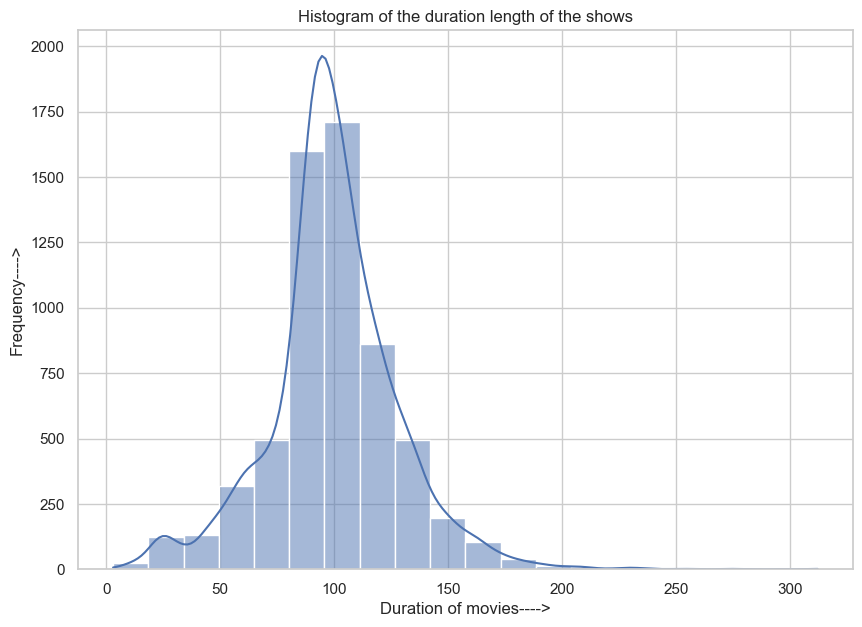

In [24]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,7))
plt.title("Histogram of the duration length of the shows")
sns.histplot(data=netflix_s_min["minutes"], bins=20, kde=True, palette=2)
plt.xlabel("Duration of movies---->")
plt.ylabel("Frequency---->")


The curve shows a normal distribution for the length duration of movies

We can plot a similar graph **Violin Plot**

### Plotting a Violin Plot

Text(0.5, 0, 'Duration(minutes)')

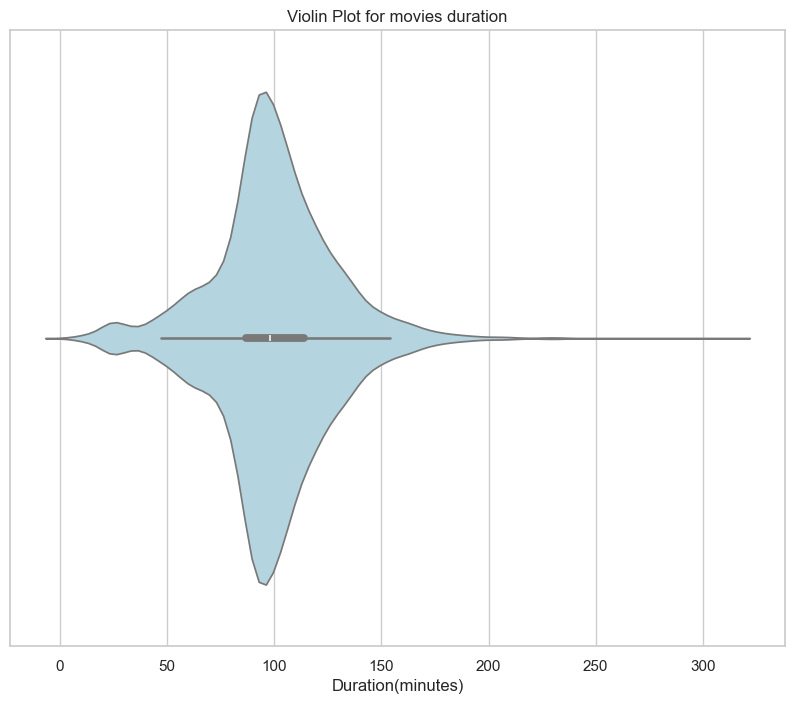

In [25]:
plt.figure(figsize=(10,8))
sns.violinplot(x=netflix_s_min["minutes"],color="lightblue")
plt.title("Violin Plot for movies duration")
plt.xlabel("Duration(minutes)")

## Genre

In [26]:
netflix_raw.listed_in.value_counts()

listed_in
Dramas, International Movies                                  362
Documentaries                                                 359
Stand-Up Comedy                                               334
Comedies, Dramas, International Movies                        274
Dramas, Independent Movies, International Movies              252
                                                             ... 
Classic & Cult TV, TV Horror, TV Mysteries                      1
British TV Shows, TV Dramas, TV Sci-Fi & Fantasy                1
Action & Adventure, Faith & Spirituality, Sci-Fi & Fantasy      1
Comedies, Cult Movies, Sports Movies                            1
Cult Movies, Dramas, Thrillers                                  1
Name: count, Length: 514, dtype: int64

### Countplot


C:\Users\USER\AppData\Local\Temp\ipykernel_16844\2764685198.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=netflix_raw.listed_in,  data=netflix_raw, order=netflix_raw.listed_in.value_counts().index[0:20], palette="Set2" )


Text(0, 0.5, 'Genre----->')

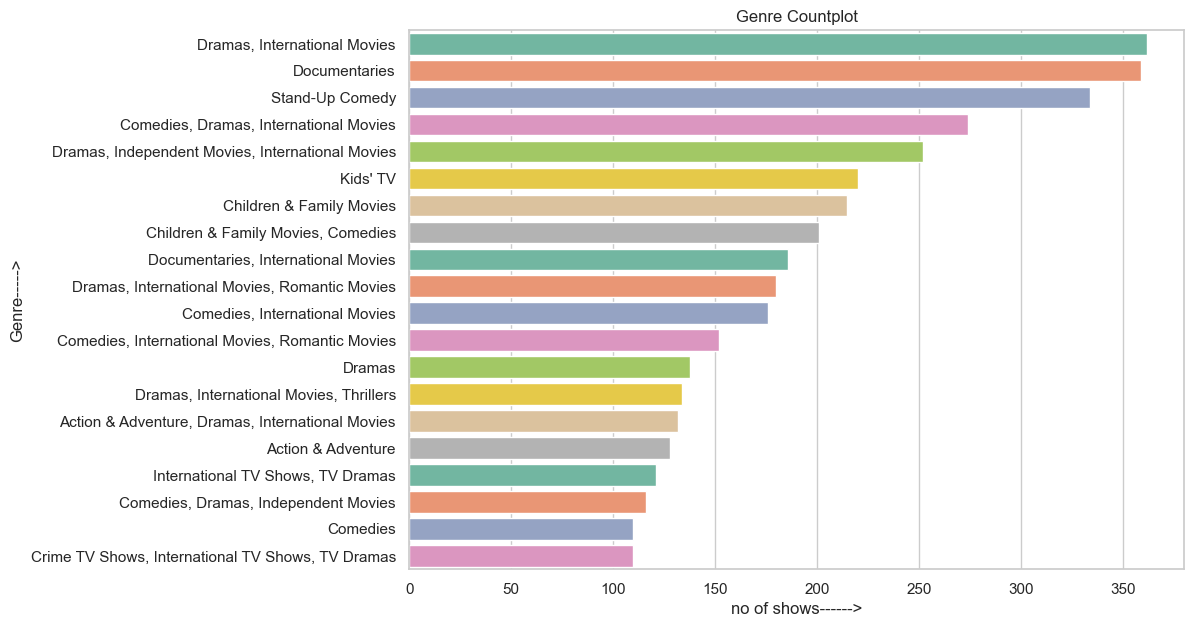

In [27]:
plt.figure(figsize=(10,7))
plt.title("Genre Countplot")
sns.countplot(y=netflix_raw.listed_in,  data=netflix_raw, order=netflix_raw.listed_in.value_counts().index[0:20], palette="Set2" )
plt.xlabel("no of shows------>")
plt.ylabel("Genre----->")

Since United States have a maximum amount of shows in netflix it will be interesting to see what type of shows it directs.

C:\Users\USER\AppData\Local\Temp\ipykernel_16844\2606635399.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=netflix_usa.listed_in,  data=netflix_raw, order=netflix_usa.listed_in.value_counts().index[0:20], palette="Set2" )


Text(0, 0.5, 'Genre----->')

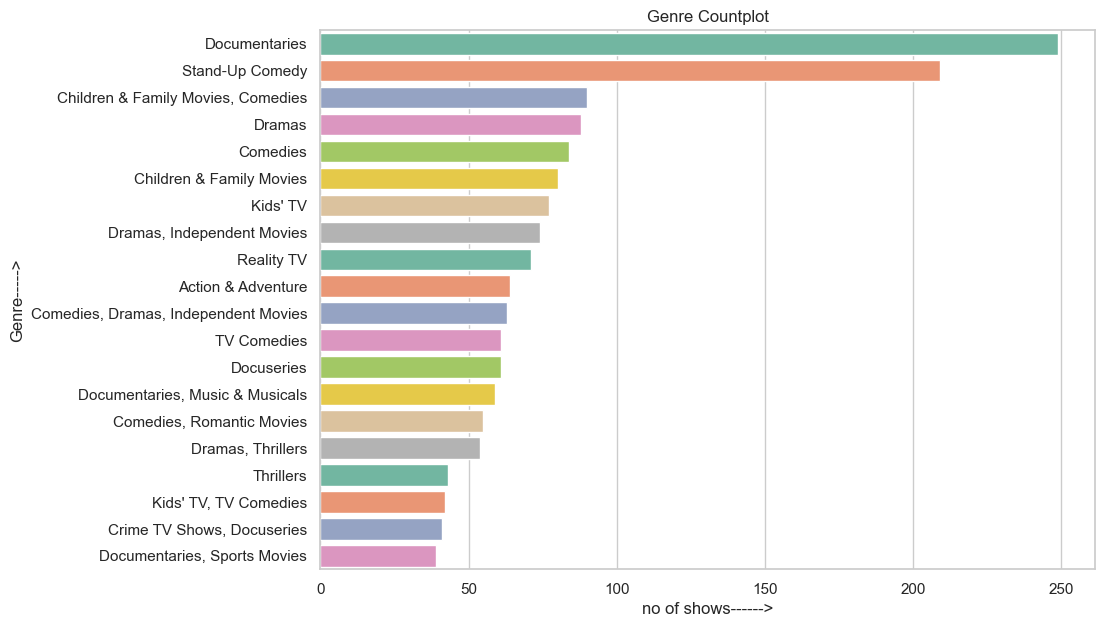

In [28]:
netflix_usa=netflix_raw[netflix_raw.country=="United States"]
plt.figure(figsize=(10,7))
plt.title("Genre Countplot")
sns.countplot(y=netflix_usa.listed_in,  data=netflix_raw, order=netflix_usa.listed_in.value_counts().index[0:20], palette="Set2" )
plt.xlabel("no of shows------>")
plt.ylabel("Genre----->")


We got a total of 2.8k+ shows from **United States** and by observing the graph we can see that the **International movies** are not contributed by the shows of **United States** which is contradicting of the overall popularity in the **Netflix Shows**. Even **Romantic Movies** come on a lower priority by the USA shows in comparison to the international trends.

Now let's plot the same type of graph for the comparison of older and newer movies

## Older movies

In [29]:
#Creating a dataframe for the older movies
netflix_old=netflix_raw[netflix_raw["release_year"].isin([2005,2007,2006])]
netflix_old


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
59,s60,Movie,Naruto Shippuden: The Movie,Hajime Kamegaki,"Junko Takeuchi, Chie Nakamura, Yoichi Masukawa...",Japan,"September 15, 2021",2007,TV-PG,95 min,"Action & Adventure, Anime Features, Internatio...",The adventures of adolescent ninja Naruto Uzum...
61,s62,Movie,Naruto the Movie 2: Legend of the Stone of Gelel,Hirotsugu Kawasaki,"Junko Takeuchi, Gamon Kaai, Chie Nakamura, Sho...",Japan,"September 15, 2021",2005,TV-PG,97 min,"Action & Adventure, Anime Features, Internatio...","While on a mission to return a missing pet, Na..."
62,s63,Movie,Naruto the Movie 3: Guardians of the Crescent ...,Toshiyuki Tsuru,"Junko Takeuchi, Chie Nakamura, Yoichi Masukawa...",Japan,"September 15, 2021",2006,TV-PG,95 min,"Action & Adventure, Anime Features, Internatio...",Exuberant ninja Naruto teams up with his pals ...
129,s130,Movie,An Unfinished Life,Lasse Hallström,"Robert Redford, Jennifer Lopez, Morgan Freeman...","Germany, United States","September 1, 2021",2005,PG-13,108 min,Dramas,A grieving widow and her daughter move in with...
142,s143,Movie,Freedom Writers,Richard LaGravenese,"Hilary Swank, Patrick Dempsey, Scott Glenn, Im...","Germany, United States","September 1, 2021",2007,PG-13,124 min,Dramas,While her at-risk students are reading classic...
...,...,...,...,...,...,...,...,...,...,...,...,...
8767,s8768,Movie,XXX: State of the Union,Lee Tamahori,"Ice Cube, Samuel L. Jackson, Willem Dafoe, Sco...",United States,"January 1, 2019",2005,PG-13,101 min,Action & Adventure,"In this action-packed follow-up to XXX, U.S. i..."
8773,s8774,Movie,Yanda Kartavya Aahe,Kedar Shinde,"Ankush Choudhary, Smita Shewale, Mohan Joshi, ...",India,"January 1, 2018",2006,TV-PG,151 min,"Comedies, Dramas, International Movies",Thanks to an arranged marriage that was design...
8793,s8794,Movie,"Yours, Mine and Ours",Raja Gosnell,"Dennis Quaid, Rene Russo, Sean Faris, Katija P...",United States,"November 20, 2019",2005,PG,88 min,"Children & Family Movies, Comedies",When a father of eight and a mother of 10 prep...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."


C:\Users\USER\AppData\Local\Temp\ipykernel_16844\3429252524.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=netflix_old.listed_in,  data=netflix_raw, order=netflix_old.listed_in.value_counts().index[0:20], palette="Set2" )


Text(0, 0.5, 'Genre----->')

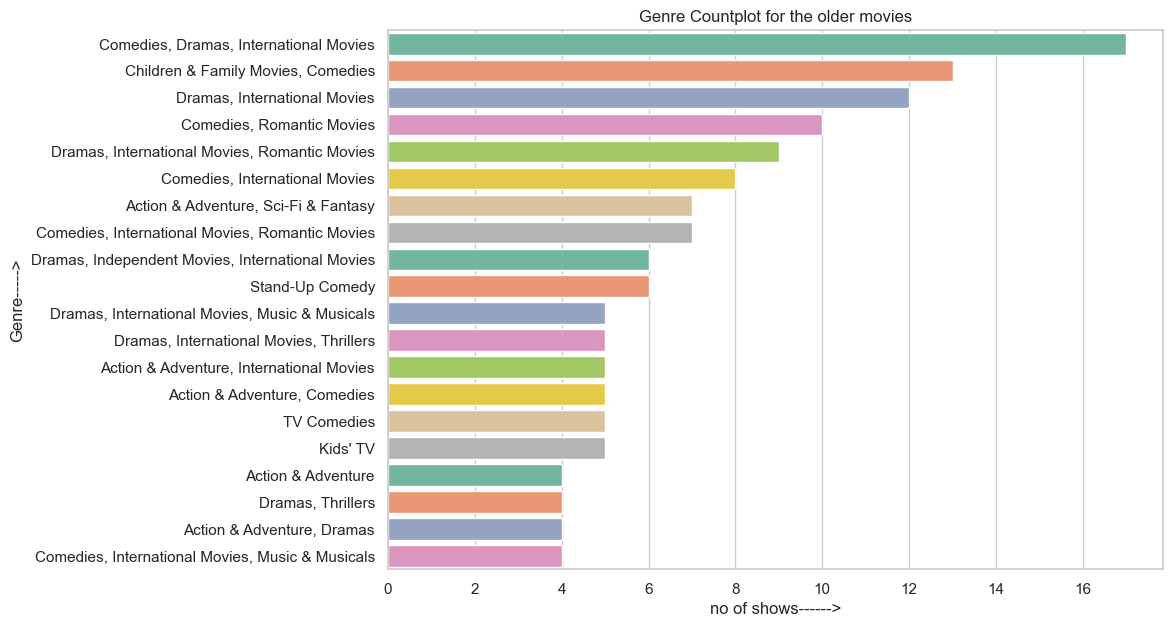

In [30]:
plt.figure(figsize=(10,7))
plt.title("Genre Countplot for the older movies")
sns.countplot(y=netflix_old.listed_in,  data=netflix_raw, order=netflix_old.listed_in.value_counts().index[0:20], palette="Set2" )
plt.xlabel("no of shows------>")
plt.ylabel("Genre----->")

## Newer movies

In [31]:
#Creating a dataframe for the older movies
netflix_new=netflix_raw[netflix_raw["release_year"].isin([2021,2020,2019])]
netflix_new

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8516,s8517,Movie,The Spy Who Fell to Earth,Thomas Meadmore,NaN,United Kingdom,"April 5, 2019",2019,TV-MA,94 min,"Documentaries, International Movies","Based on Dr. Ahron Bregman's book, this docume..."
8631,s8632,Movie,Trixie Mattel: Moving Parts,Nicholas Zeig-Owens,Brian Firkus,United States,"March 27, 2020",2019,TV-MA,91 min,"Documentaries, Music & Musicals",Drag queen Trixie Mattel deals with the bitter...
8718,s8719,Movie,Westside vs. the World,Michael Fahey,"Ron Perlman, Louie Simmons",NaN,"August 9, 2019",2019,TV-MA,96 min,"Documentaries, Sports Movies",A look into the journey of influential strengt...
8752,s8753,Movie,Wish Man,Theo Davies,"Andrew Steel, Kirby Bliss Blanton, Tom Sizemor...",United States,"December 3, 2019",2019,TV-14,108 min,"Children & Family Movies, Dramas","After surviving a life-threatening accident, a..."


C:\Users\USER\AppData\Local\Temp\ipykernel_16844\575850485.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=netflix_new.listed_in,  data=netflix_raw, order=netflix_new.listed_in.value_counts().index[0:20], palette="Set2" )


Text(0, 0.5, 'Genre----->')

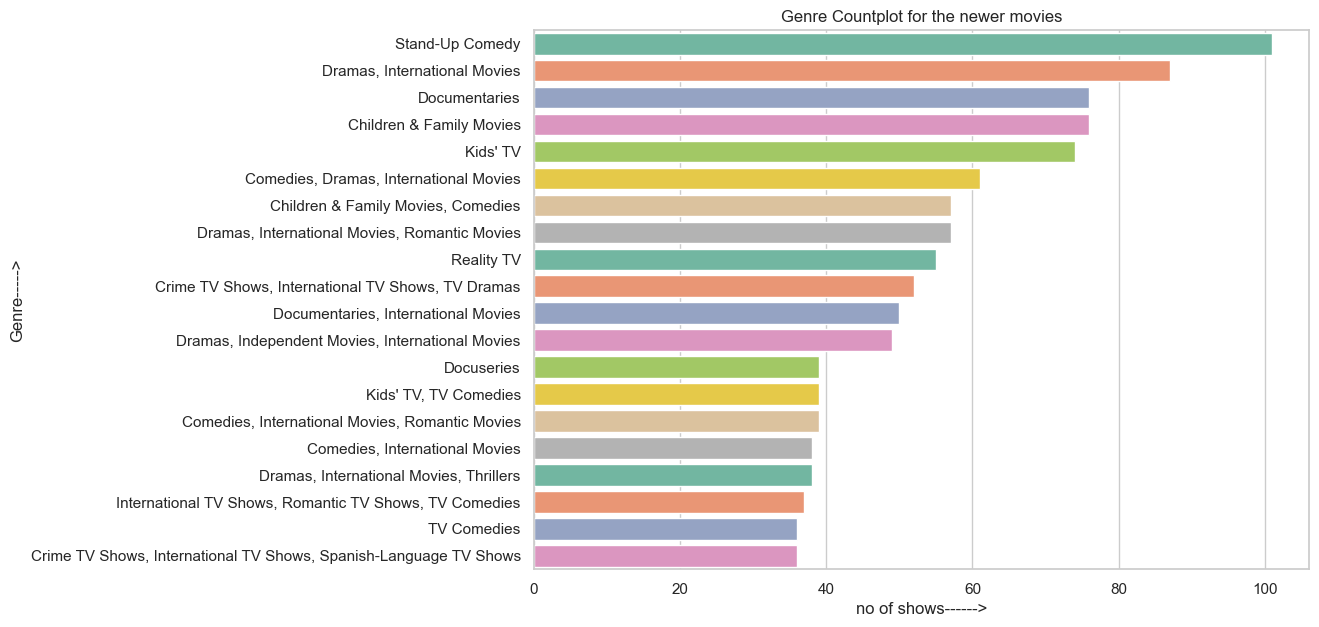

In [32]:
plt.figure(figsize=(10,7))
plt.title("Genre Countplot for the newer movies")
sns.countplot(y=netflix_new.listed_in,  data=netflix_raw, order=netflix_new.listed_in.value_counts().index[0:20], palette="Set2" )
plt.xlabel("no of shows------>")
plt.ylabel("Genre----->")

let's plot all of these graphs on a same plane to

C:\Users\USER\AppData\Local\Temp\ipykernel_16844\1715264540.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=netflix_new.listed_in,  data=netflix_raw, order=netflix_new.listed_in.value_counts().index[0:20], palette="Set2",ax=axes[0,0] );
C:\Users\USER\AppData\Local\Temp\ipykernel_16844\1715264540.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=netflix_usa.listed_in,  data=netflix_raw, order=netflix_usa.listed_in.value_counts().index[0:20], palette="Set2", ax=axes[0,1] )
C:\Users\USER\AppData\Local\Temp\ipykernel_16844\1715264540.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and

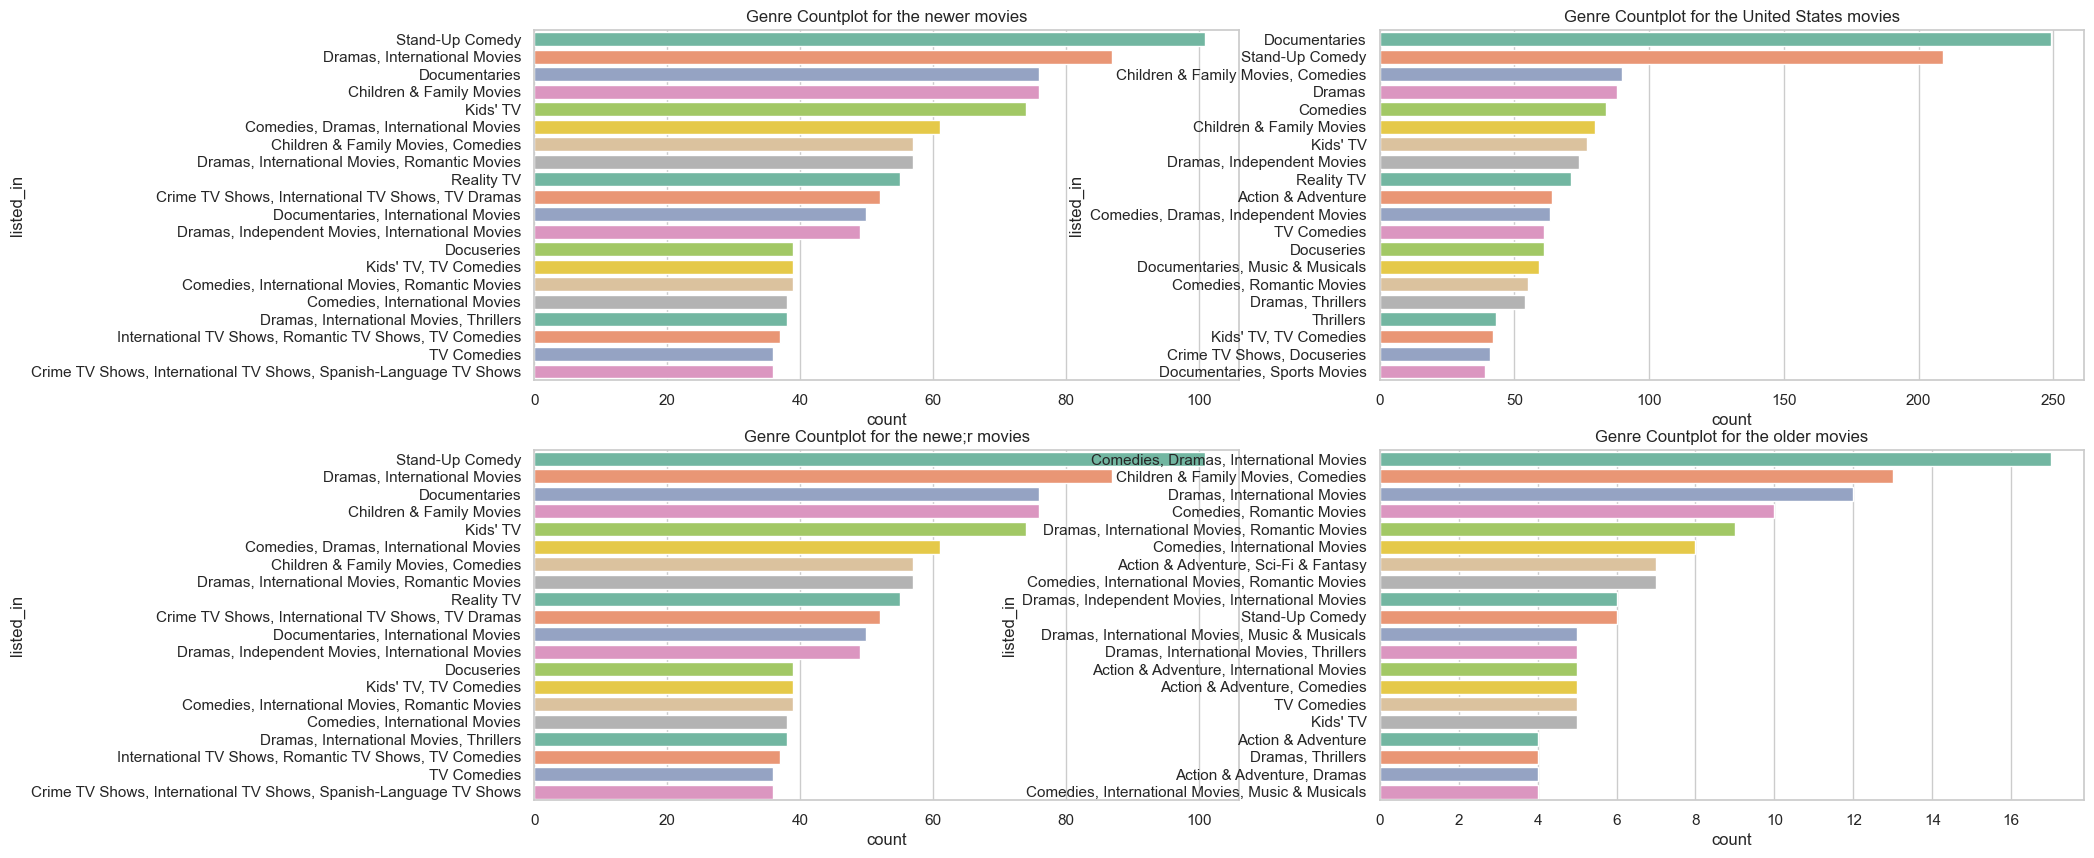

In [35]:
fig, axes = plt.subplots(2, 2, figsize=(20,10));
axes[0,0].set_title("Genre Countplot for the newer movies")
sns.countplot(y=netflix_new.listed_in,  data=netflix_raw, order=netflix_new.listed_in.value_counts().index[0:20], palette="Set2",ax=axes[0,0] );
#plt.xlabel("no of shows------>")
#plt.ylabel("Genre----->")

axes[0,1].set_title("Genre Countplot for the United States movies");
sns.countplot(y=netflix_usa.listed_in,  data=netflix_raw, order=netflix_usa.listed_in.value_counts().index[0:20], palette="Set2", ax=axes[0,1] )


axes[1,0].set_title("Genre Countplot for the newe;r movies")
sns.countplot(y=netflix_new.listed_in,  data=netflix_raw, order=netflix_new.listed_in.value_counts().index[0:20], palette="Set2",ax=axes[1,0] );

axes[1,1].set_title("Genre Countplot for the older movies");
sns.countplot(y=netflix_old.listed_in,  data=netflix_raw, order=netflix_old.listed_in.value_counts().index[0:20], palette="Set2",ax=axes[1,1] );
